# RxMG Campagin Analytics

In [165]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# read an excel file and convert  
# into a dataframe object 


data = pd.read_csv("t1.csv")

data = data.iloc[:, :-3]
data = data.sort_values(by='Date1') 
data.Date1 = '0' + data.Date1
data = data.dropna()

data = data.drop(['Name', 'Offer ID1', 'Operational Status1', 'Remaining Budget', '# Drops', 'Payout Type1', 'Offer Name1'], axis=1)

data['eCPM'] = data['eCPM'].str.replace('$', '').astype(float) # $
data['CTR'] = data['CTR'].str.replace('%', '').astype(float) # %
data['EPC'] = data['EPC'].str.replace('$', '').astype(float) #  $
data['CLR'] = data['CLR'].str.replace('%', '').astype(float) # % 
data['Click Rate'] = data['Click Rate'].str.replace('%', '').astype(float) # %
data['Open Rate'] = data['Open Rate'].str.replace('%', '').astype(float) # %
data['Revenue'] = data['Revenue'].str.replace('$', '').astype(float) # $

In [196]:
# Fixing datetimes
def insert_0(series, index):
    new_times = []
    for time in series:
        if len(time)<8:   
            modified = time[:index] + '0' + time[index:]
            new_times.append(modified)
        else:
            new_times.append(time)
    return new_times

data = data.assign(Date = lambda x: insert_0(x['Date1'].values,3)) 

In [197]:
data.head(3)

,Affiliate ID1,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Data Provider (group),Data Vertical,Date1,Delivered,Open Rate,Opens,Revenue,Segment1,Date
76,460650.0,0.00,0.15,0.00,1.18,4.51,42.0,Venice,Personal Loan,01/31/20,28570.0,3.26,931.0,0.0,O30,01/31/20
67,460809.0,5.38,2.11,0.25,1.39,13.28,334.0,Venice,Personal Loan,02/10/20,15792.0,15.93,2516.0,85.0,O21,02/10/20
80,460661.0,5.68,1.76,0.32,0.95,12.89,527.0,Venice,Personal Loan,02/11/20,29949.0,13.65,4088.0,170.0,O30,02/11/20


In [198]:
num_data = data[['Date','eCPM', 'CTR','EPC','CLR','Click Rate', 'Clicks', 'Delivered','Open Rate','Opens', 'Revenue']]
num_data.head(5)

,Date,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue
76,01/31/20,0.00,0.15,0.00,1.18,4.51,42.0,28570.0,3.26,931.0,0.0
67,02/10/20,5.38,2.11,0.25,1.39,13.28,334.0,15792.0,15.93,2516.0,85.0
80,02/11/20,5.68,1.76,0.32,0.95,12.89,527.0,29949.0,13.65,4088.0,170.0
100,02/11/20,10.48,3.14,0.33,0.16,11.46,1325.0,42171.0,27.41,11557.0,442.0
78,02/14/20,6.50,2.08,0.31,0.58,17.62,544.0,26151.0,11.80,3087.0,170.0


In [199]:
corr_matrix = num_data.corr()    # Revenue associated per 1000 emails is more correlated w CTR and Open Rate
corr_matrix['eCPM'].sort_values(ascending=False)

eCPM          1.000000
CTR           0.826402
Open Rate     0.694757
Revenue       0.557383
EPC           0.546380
Clicks        0.300535
Click Rate    0.217015
Opens        -0.020161
Delivered    -0.204482
CLR          -0.266749
Name: eCPM, dtype: float64

# Using a correlation matrix, I find that CTR correlates most obviously correlates with eCPM:
- This makes sense because bringing more customers to a landing page (CTR) should translate to greater earnings over thousands of emails or offers (eCPM). 

# Using the 4915 tab in Excel, summarize the performance of this offer compared to the stats in the Dataset Averages tab.
### According to this analysis, should we continue to market this offer to our consumers?

In [200]:
average = pd.read_csv("average.csv")
average = average.iloc[:, 1:]
average.columns = average.iloc[0]
average = average.iloc[1:, :]


average.head(1)

,eCPM,CTR,EPC,CLR,# Drops,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue,nan,nan,nan
1,$3.88,0.62%,$1.26,0.93%,"14,767.00",4.60%,"3,834,091","876,525,972",14.03%,"104,963,423","$3,402,221.14",NaN,NaN,NaN


In [201]:
num_data.describe()

,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,4.150550,1.443394,0.278440,0.686972,10.691468,597.504587,52829.587156,14.038073,7157.889908,169.688073
std,3.496684,0.929277,0.142102,1.495861,4.607363,505.682315,69998.117589,6.770972,12827.574266,171.254343
min,0.000000,0.100000,0.000000,0.000000,2.700000,42.000000,6812.000000,0.500000,631.000000,0.000000
25%,1.620000,0.820000,0.200000,0.000000,8.010000,283.000000,26151.000000,10.190000,2645.000000,68.000000
50%,3.740000,1.280000,0.260000,0.310000,10.120000,476.000000,38125.000000,13.500000,4719.000000,119.000000
75%,5.540000,1.850000,0.360000,0.640000,12.780000,759.000000,60720.000000,17.100000,7604.000000,204.000000
max,21.900000,5.340000,0.660000,8.560000,28.100000,3621.000000,688381.000000,34.200000,130167.000000,935.000000


# Things to notice when comparing with historical averages:
- This offer boasts a eCPM of 4.15 versus 3.88. Deviaton is large however (volatile campaign)
- CTR is much higher: 1.44 versus 0.62. This campagin is more successful at generating bringing customers to the landing page
- Click Rate is far higher. 
- CLR is lower: 0.687 versus 0.93 GOOD
- Click Rate is also much higher: 10.69 versus 4.60. Advertising is successful
- Average EPC is far lower: 0.27 versus 1.26. Struggles with conversion once user is brought to landing page
- Open rate is the same

# Adding days to our dataframe

In [202]:
import datetime
import calendar

def findDay(series): 
    days = []
    for date in series:
        x = datetime.datetime.strptime(date, '%m/%d/%y').weekday() 
        day = calendar.day_name[x]
        days.append(day)
    return days



num_data = num_data.assign(days = lambda x: findDay(x['Date'].values)) 

In [203]:
num_data.head(5)

,Date,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue,days
76,01/31/20,0.00,0.15,0.00,1.18,4.51,42.0,28570.0,3.26,931.0,0.0,Friday
67,02/10/20,5.38,2.11,0.25,1.39,13.28,334.0,15792.0,15.93,2516.0,85.0,Monday
80,02/11/20,5.68,1.76,0.32,0.95,12.89,527.0,29949.0,13.65,4088.0,170.0,Tuesday
100,02/11/20,10.48,3.14,0.33,0.16,11.46,1325.0,42171.0,27.41,11557.0,442.0,Tuesday
78,02/14/20,6.50,2.08,0.31,0.58,17.62,544.0,26151.0,11.80,3087.0,170.0,Friday


In [204]:
average_click_M = (num_data.loc[num_data['days'] == 'Monday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Monday', 'Clicks'].count())
average_click_T = (num_data.loc[num_data['days'] == 'Tuesday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Tuesday', 'Clicks'].count())
average_click_W = (num_data.loc[num_data['days'] == 'Wednesday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Wednesday', 'Clicks'].count())
average_click_R = (num_data.loc[num_data['days'] == 'Thursday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Thursday', 'Clicks'].count())
average_click_F = (num_data.loc[num_data['days'] == 'Friday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Friday', 'Clicks'].count())
average_click_S = (num_data.loc[num_data['days'] == 'Saturday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Saturday', 'Clicks'].count())
average_click_SN = (num_data.loc[num_data['days'] == 'Sunday', 'Clicks'].sum())/(num_data.loc[num_data['days'] == 'Sunday', 'Clicks'].count())

average_rev_M = (num_data.loc[num_data['days'] == 'Monday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Monday', 'Revenue'].count())
average_rev_T = (num_data.loc[num_data['days'] == 'Tuesday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Tuesday', 'Revenue'].count())
average_rev_W = (num_data.loc[num_data['days'] == 'Wednesday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Wednesday', 'Revenue'].count())
average_rev_R = (num_data.loc[num_data['days'] == 'Thursday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Thursday', 'Revenue'].count())
average_rev_F = (num_data.loc[num_data['days'] == 'Friday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Friday', 'Revenue'].count())
average_rev_S = (num_data.loc[num_data['days'] == 'Saturday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Saturday', 'Revenue'].count())
average_rev_SN = (num_data.loc[num_data['days'] == 'Sunday', 'Revenue'].sum())/(num_data.loc[num_data['days'] == 'Sunday', 'Revenue'].count())

# Normalize data

In [205]:
from sklearn import preprocessing


click_data = {'SN': average_click_SN, 'M': average_click_M, 'T': average_click_T, 'W': average_click_W, 'R': average_click_R, 
              'F': average_click_F, 'S': average_click_S}

rev_data = {'SN': average_rev_SN, 'M': average_rev_M, 'T': average_rev_T, 'W': average_rev_W, 'R': average_rev_R, 
              'F': average_rev_F, 'S': average_rev_S}

names = list(click_data.keys())


values = (list(click_data.values()))
values_1 = list(rev_data.values())

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#values = NormalizeData(values)
#values_1 = NormalizeData(values_1)

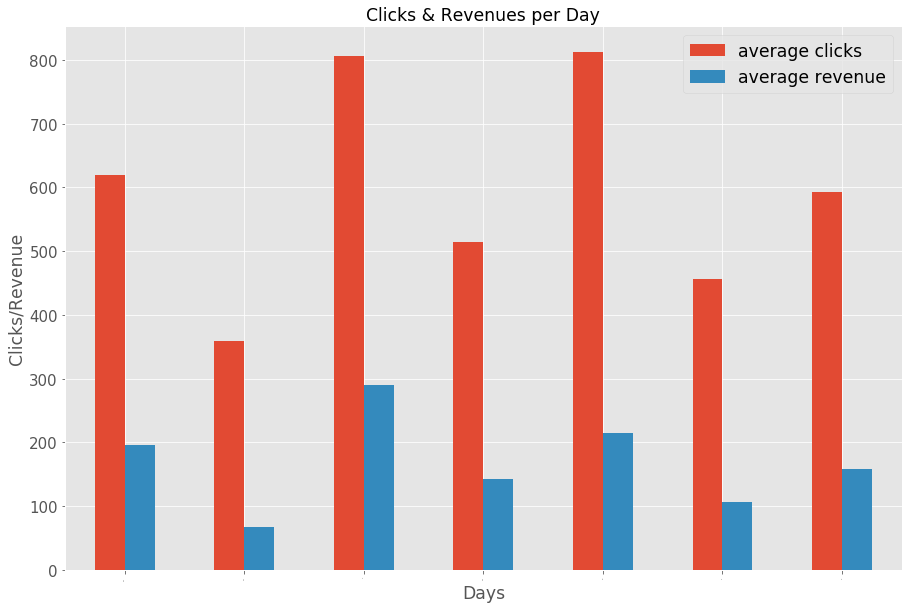

In [206]:
df = pd.DataFrame(np.c_[values,values_1], index=names)
df.plot.bar(figsize=(15,10))
plt.style.use('ggplot')

#plt.bar(X + 0.00, names, values, label = "average clicks", color = 'b', width = 0.25)
#plt.bar(X + 0.25, names, values_1, label = "average EPC", color = 'g', width = 0.25)
plt.xlabel('Days', size="xx-large")
plt.ylabel('Clicks/Revenue', size="xx-large")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.title('Clicks & Revenues per Day', size='xx-large')
plt.legend(labels=['average clicks','average revenue'], fontsize='xx-large', title_fontsize='40')

# Here, we see that average revenue and average clicks are greatest on Tuesdays and Thursdays. These are high-traffic days which result in significant conversions

In [207]:
average_eCPM_M = (num_data.loc[num_data['days'] == 'Monday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Monday', 'eCPM'].count())
average_eCPM_T = (num_data.loc[num_data['days'] == 'Tuesday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Tuesday', 'eCPM'].count())
average_eCPM_W = (num_data.loc[num_data['days'] == 'Wednesday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Wednesday', 'eCPM'].count())
average_eCPM_R = (num_data.loc[num_data['days'] == 'Thursday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Thursday', 'eCPM'].count())
average_eCPM_F = (num_data.loc[num_data['days'] == 'Friday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Friday', 'eCPM'].count())
average_eCPM_S = (num_data.loc[num_data['days'] == 'Saturday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Saturday', 'eCPM'].count())
average_eCPM_SN = (num_data.loc[num_data['days'] == 'Sunday', 'eCPM'].sum())/(num_data.loc[num_data['days'] == 'Sunday', 'eCPM'].count())

average_EPC_M = (num_data.loc[num_data['days'] == 'Monday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Monday', 'EPC'].count())
average_EPC_T = (num_data.loc[num_data['days'] == 'Tuesday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Tuesday', 'EPC'].count())
average_EPC_W = (num_data.loc[num_data['days'] == 'Wednesday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Wednesday', 'EPC'].count())
average_EPC_R = (num_data.loc[num_data['days'] == 'Thursday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Thursday', 'EPC'].count())
average_EPC_F = (num_data.loc[num_data['days'] == 'Friday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Friday', 'EPC'].count())
average_EPC_S = (num_data.loc[num_data['days'] == 'Saturday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Saturday', 'EPC'].count())
average_EPC_SN = (num_data.loc[num_data['days'] == 'Sunday', 'EPC'].sum())/(num_data.loc[num_data['days'] == 'Sunday', 'EPC'].count())

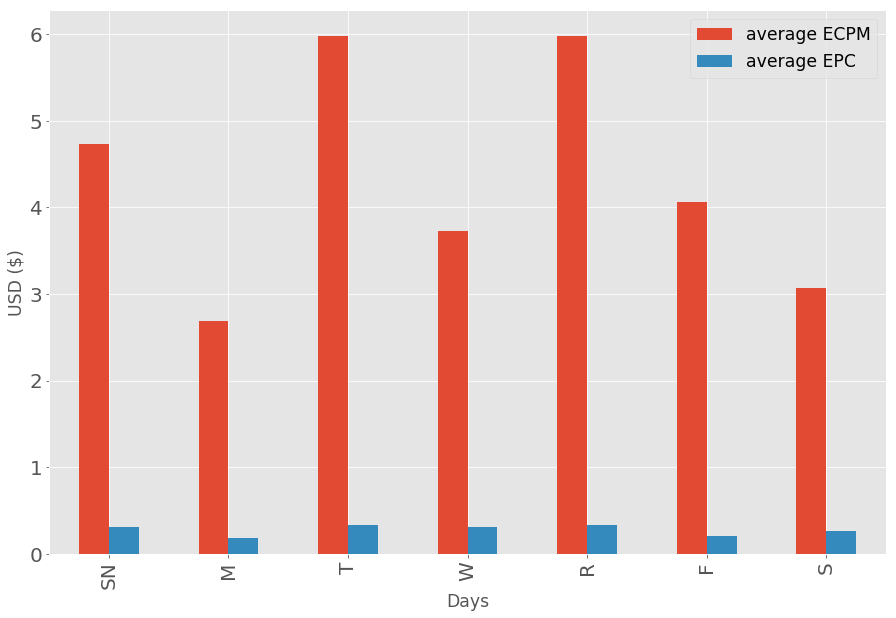

In [208]:
eCPM_data = {'SN': average_eCPM_SN, 'M': average_eCPM_M, 'T': average_eCPM_T, 'W': average_eCPM_W, 'R': average_eCPM_T, 
              'F': average_eCPM_F, 'S': average_eCPM_S}

EPC_data = {'SN': average_EPC_SN, 'M': average_EPC_M, 'T': average_EPC_T, 'W': average_EPC_W, 'R': average_EPC_T, 
              'F': average_EPC_F, 'S': average_EPC_S}

names = list(eCPM_data.keys())

values = (list(eCPM_data.values()))
values_1 = list(EPC_data.values())
#values = NormalizeData(values)
#values_1 = NormalizeData(values_1)


df = pd.DataFrame(np.c_[values,values_1], index=names)
df.plot.bar(figsize=(15,10))
plt.style.use('ggplot')

#plt.bar(X + 0.00, names, values, label = "average clicks", color = 'b', width = 0.25)
#plt.bar(X + 0.25, names, values_1, label = "average EPC", color = 'g', width = 0.25)
plt.xlabel('Days', size="xx-large")
plt.ylabel('USD ($)', size="xx-large")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.legend(labels=['average ECPM','average EPC'], fontsize='xx-large', title_fontsize='40')

# Similarly, we see that eCPM and EPC are also greatest on these days

In [209]:
data.head(5)

,Affiliate ID1,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Data Provider (group),Data Vertical,Date1,Delivered,Open Rate,Opens,Revenue,Segment1,Date
76,460650.0,0.00,0.15,0.00,1.18,4.51,42.0,Venice,Personal Loan,01/31/20,28570.0,3.26,931.0,0.0,O30,01/31/20
67,460809.0,5.38,2.11,0.25,1.39,13.28,334.0,Venice,Personal Loan,02/10/20,15792.0,15.93,2516.0,85.0,O21,02/10/20
80,460661.0,5.68,1.76,0.32,0.95,12.89,527.0,Venice,Personal Loan,02/11/20,29949.0,13.65,4088.0,170.0,O30,02/11/20
100,460351.0,10.48,3.14,0.33,0.16,11.46,1325.0,Venice,Credit,02/11/20,42171.0,27.41,11557.0,442.0,O30,02/11/20
78,460587.0,6.50,2.08,0.31,0.58,17.62,544.0,Venice,Credit,02/14/20,26151.0,11.80,3087.0,170.0,O30,02/14/20


# Now: What type of data vertical generates most revenue?
- Calculate average EPC, eCPM, revenue for each data vertical

In [210]:
average_eCPM_credit = (data.loc[data['Data Vertical'] == 'Credit', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Credit', 'eCPM'].count())
average_eCPM_loan = (data.loc[data['Data Vertical'] == 'Personal Loan', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Personal Loan', 'eCPM'].count())
average_eCPM_FHA = (data.loc[data['Data Vertical'] == 'FHA', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'FHA', 'eCPM'].count())
average_eCPM_Grants = (data.loc[data['Data Vertical'] == 'Grants', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Grants', 'eCPM'].count())
average_eCPM_RentToOwn = (data.loc[data['Data Vertical'] == 'Rent To Own', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Rent To Own', 'eCPM'].count())
average_eCPM_Paleo = (data.loc[data['Data Vertical'] == 'Paleo', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Paleo', 'eCPM'].count())
average_eCPM_Refinance = (data.loc[data['Data Vertical'] == 'Refinance', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Refinance', 'eCPM'].count())
average_eCPM_Internal = (data.loc[data['Data Vertical'] == 'Internal', 'eCPM'].sum())/(data.loc[data['Data Vertical'] == 'Internal', 'eCPM'].count())

average_EPC_credit = (data.loc[data['Data Vertical'] == 'Credit', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Credit', 'EPC'].count())
average_EPC_loan = (data.loc[data['Data Vertical'] == 'Personal Loan', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Personal Loan', 'EPC'].count())
average_EPC_FHA = (data.loc[data['Data Vertical'] == 'FHA', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'FHA', 'EPC'].count())
average_EPC_Grants = (data.loc[data['Data Vertical'] == 'Grants', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Grants', 'EPC'].count())
average_EPC_RentToOwn = (data.loc[data['Data Vertical'] == 'Rent To Own', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Rent To Own', 'EPC'].count())
average_EPC_Paleo = (data.loc[data['Data Vertical'] == 'Paleo', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Paleo', 'EPC'].count())
average_EPC_Refinance = (data.loc[data['Data Vertical'] == 'Refinance', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Refinance', 'EPC'].count())
average_EPC_Internal = (data.loc[data['Data Vertical'] == 'Internal', 'EPC'].sum())/(data.loc[data['Data Vertical'] == 'Internal', 'EPC'].count())

average_rev_credit = (data.loc[data['Data Vertical'] == 'Credit', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Credit', 'Revenue'].count())
average_rev_loan = (data.loc[data['Data Vertical'] == 'Personal Loan', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Personal Loan', 'Revenue'].count())
average_rev_FHA = (data.loc[data['Data Vertical'] == 'FHA', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'FHA', 'Revenue'].count())
average_rev_Grants = (data.loc[data['Data Vertical'] == 'Grants', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Grants', 'Revenue'].count())
average_rev_RentToOwn = (data.loc[data['Data Vertical'] == 'Rent To Own', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Rent To Own', 'Revenue'].count())
average_rev_Paleo = (data.loc[data['Data Vertical'] == 'Paleo', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Paleo', 'Revenue'].count())
average_rev_Refinance = (data.loc[data['Data Vertical'] == 'Refinance', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Refinance', 'Revenue'].count())
average_rev_Internal = (data.loc[data['Data Vertical'] == 'Internal', 'Revenue'].sum())/(data.loc[data['Data Vertical'] == 'Internal', 'Revenue'].count())

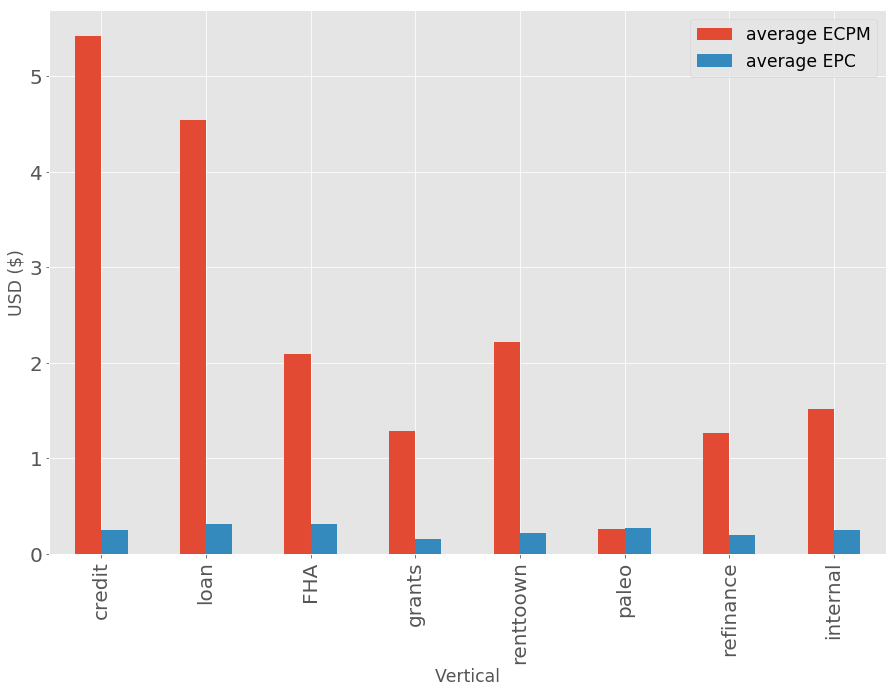

In [211]:
eCPM_data = {'credit': average_eCPM_credit, 'loan': average_eCPM_loan, 'FHA': average_eCPM_FHA, 'grants': average_eCPM_Grants, 
             'renttoown': average_eCPM_RentToOwn, 'paleo': average_eCPM_Paleo, 'refinance': average_eCPM_Refinance,
            'internal': average_eCPM_Internal}

EPC_data = {'credit': average_EPC_credit, 'loan': average_EPC_loan, 'FHA': average_EPC_FHA, 'grants': average_EPC_Grants,
            'renttoown': average_EPC_RentToOwn, 'paleo': average_EPC_Paleo, 'refinance': average_EPC_Refinance,
           'internal':average_EPC_Internal}

rev_data = {'credit': average_rev_credit, 'loan': average_rev_loan, 'FHA': average_rev_FHA, 'grants': average_rev_Grants,
            'renttoown': average_rev_RentToOwn, 'paleo': average_rev_Paleo, 'refinance': average_rev_Refinance,
           'internal':average_rev_Internal}

names = list(eCPM_data.keys())

values = (list(eCPM_data.values()))
values_1 = list(EPC_data.values())
values_2 = list(rev_data.values())
#values = NormalizeData(values)
#values_1 = NormalizeData(values_1)


df = pd.DataFrame(np.c_[values,values_1], index=names)
df.plot.bar(figsize=(15,10))

#plt.bar(X + 0.00, names, values, label = "average clicks", color = 'b', width = 0.25)
#plt.bar(X + 0.25, names, values_1, label = "average EPC", color = 'g', width = 0.25)
plt.xlabel('Vertical', size="xx-large")
plt.ylabel('USD ($)', size="xx-large")
plt.legend(labels=['average ECPM','average EPC'], fontsize='xx-large', title_fontsize='40')

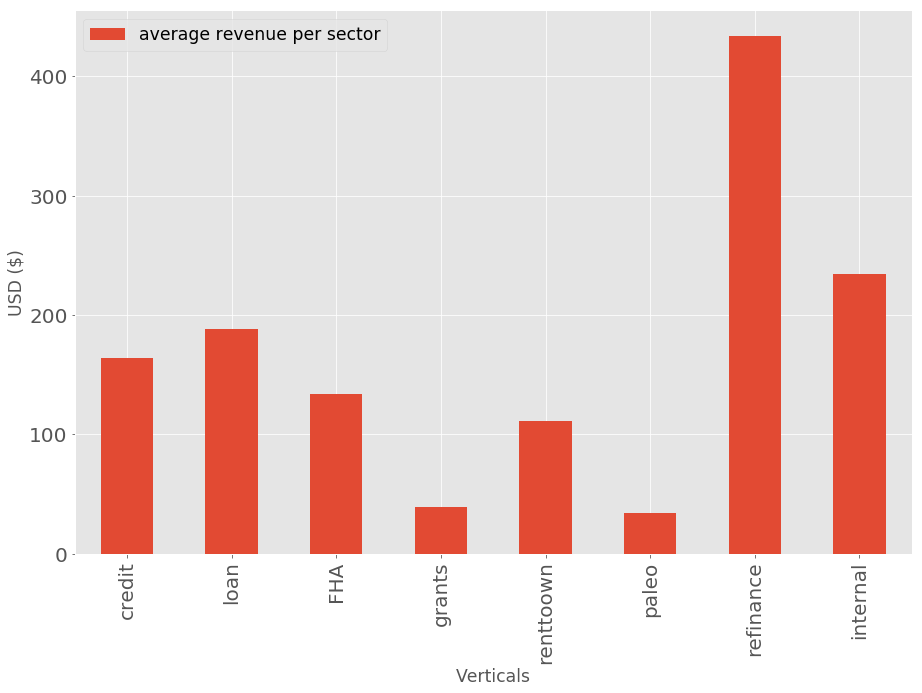

In [212]:
df = pd.DataFrame(np.c_[values_2], index=names)
df.plot.bar(figsize=(15,10))
plt.style.use('ggplot')

#plt.bar(X + 0.00, names, values, label = "average clicks", color = 'b', width = 0.25)
#plt.bar(X + 0.25, names, values_1, label = "average EPC", color = 'g', width = 0.25)
plt.xlabel('Verticals', size="xx-large")
plt.ylabel('USD ($)', size="xx-large")
plt.legend(labels=['average revenue per sector'], fontsize='xx-large', title_fontsize='40')

# Let's look at cumulative revenue over time

In [213]:
num_data.head(5)

,Date,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue,days
76,01/31/20,0.00,0.15,0.00,1.18,4.51,42.0,28570.0,3.26,931.0,0.0,Friday
67,02/10/20,5.38,2.11,0.25,1.39,13.28,334.0,15792.0,15.93,2516.0,85.0,Monday
80,02/11/20,5.68,1.76,0.32,0.95,12.89,527.0,29949.0,13.65,4088.0,170.0,Tuesday
100,02/11/20,10.48,3.14,0.33,0.16,11.46,1325.0,42171.0,27.41,11557.0,442.0,Tuesday
78,02/14/20,6.50,2.08,0.31,0.58,17.62,544.0,26151.0,11.80,3087.0,170.0,Friday


In [214]:
num_data['Cumulative Revenue'] =  num_data['Revenue'].cumsum()

In [215]:
num_data.tail(2)

,Date,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue,days,Cumulative Revenue
8,04/09/20,2.24,0.67,0.33,0.00,6.6,408.0,60720.0,10.1,6157.0,136.0,Thursday,17884.0
90,04/09/20,0.89,0.53,0.17,0.71,2.8,3621.0,688381.0,18.9,130167.0,612.0,Thursday,18496.0


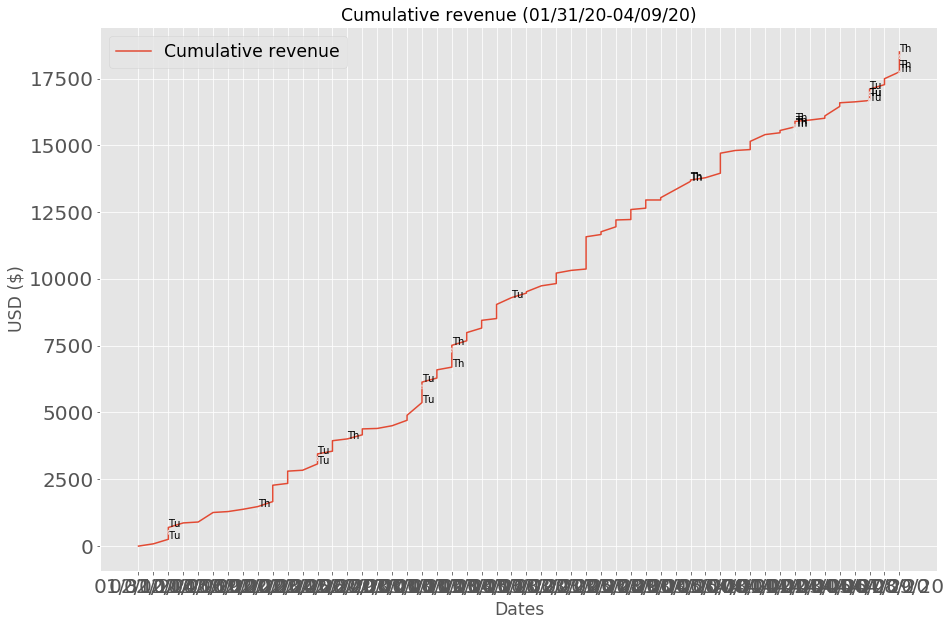

In [216]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.plot(num_data['Date'], num_data['Cumulative Revenue'], '-')
plt.xlabel('Dates', size="xx-large")
plt.ylabel('USD ($)', size="xx-large")
plt.rc('xtick',labelsize=2)
plt.rc('ytick',labelsize=15)
plt.title("Cumulative revenue (01/31/20-04/09/20)", size="xx-large")
plt.legend(labels=['Cumulative revenue'], fontsize='xx-large', title_fontsize='40')

# For labeling
arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")
#bbox = dict(boxstyle ="round", fc ="0.8") 

for idx, row in num_data.iterrows():
    if row['days'] == 'Thursday' or row['days'] == 'Tuesday':
        plt.annotate(row['days'][:2], (row['Date'], row['Cumulative Revenue']),textcoords='data',  arrowprops = arrowprops)

In [217]:
T_df = num_data.loc[num_data['days']=='Tuesday']
R_df = num_data.loc[num_data['days']=='Thursday']

In [218]:
# Get these Date -> Retrieve from num_data

In [219]:
T_R_indexes = [i for i in T_df.index]+[i for i in R_df.index]

In [220]:
T_R_data = num_data.ix[T_R_indexes]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [191]:
T_R_data.head(5)

,Date,eCPM,CTR,EPC,CLR,Click Rate,Clicks,Delivered,Open Rate,Opens,Revenue,days,Cumulative Revenue
80,02/11/20,5.68,1.76,0.32,0.95,12.89,527.0,29949.0,13.65,4088.0,170.0,Tuesday,255.0
100,02/11/20,10.48,3.14,0.33,0.16,11.46,1325.0,42171.0,27.41,11557.0,442.0,Tuesday,697.0
73,02/25/20,8.06,2.56,0.32,0.20,12.51,755.0,29511.0,20.44,6033.0,238.0,Tuesday,3077.0
84,02/25/20,6.34,1.73,0.37,0.30,9.37,1019.0,58962.0,18.44,10875.0,374.0,Tuesday,3451.0
21,03/10/20,6.87,1.68,0.41,0.00,9.50,1160.0,69242.0,17.70,12262.0,476.0,Tuesday,5372.0


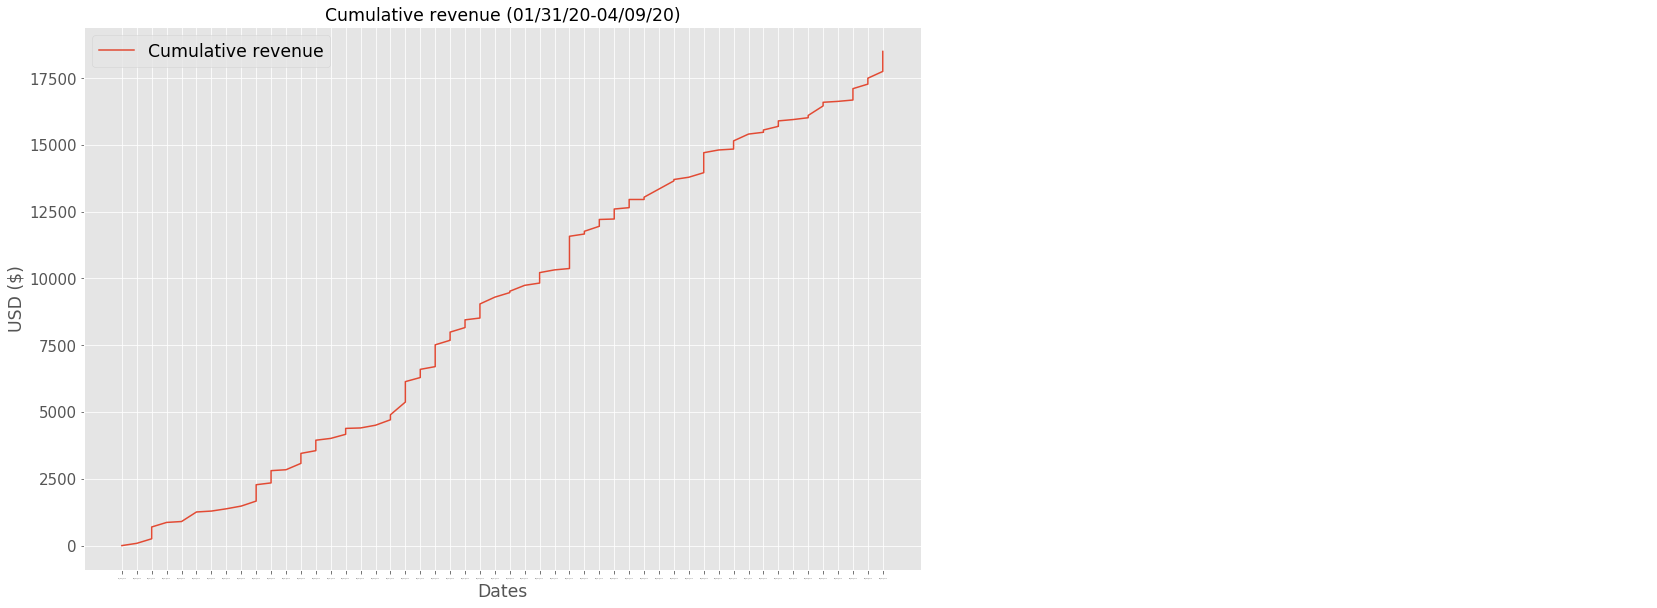

In [192]:
plt.figure(figsize=(15,10))

plt.style.use('ggplot')
plt.plot(num_data['Date'], num_data['Cumulative Revenue'], '-')
plt.xlabel('Dates', size="xx-large")
plt.ylabel('USD ($)', size="xx-large")
plt.rc('xtick',labelsize=2)
plt.rc('ytick',labelsize=15)

plt.annotate('Test',
             (T_R_data.index[1], T_R_data['Revenue'][1]),
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))

plt.title("Cumulative revenue (01/31/20-04/09/20)", size="xx-large")
plt.legend(labels=['Cumulative revenue'], fontsize='xx-large', title_fontsize='40')